In [2]:
#Netflix prize dataset
#importing the necessary libraries for importing the dataset
#Around100M+ ratings 4499 movies 480,000 users
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reading dataset file
netflix_dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [5]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [6]:

# netflix_dataset['Rating']=netflix_dataset['Rating'].astype(float)

In [69]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [7]:

netflix_dataset.shape

(24058263, 2)

In [8]:
#get the customer count with NaN values
movie_count=netflix_dataset.isnull().sum()
movie_count

Cust_Id       0
Rating     4499
dtype: int64

In [9]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()

In [10]:
customer_count

475257

In [11]:
#without NaN values
customer_count=netflix_dataset['Cust_Id'].nunique()-movie_count
customer_count

Cust_Id    475257
Rating     470758
dtype: int64

In [12]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

Cust_Id    24058263
Rating     24053764
dtype: int64

In [13]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

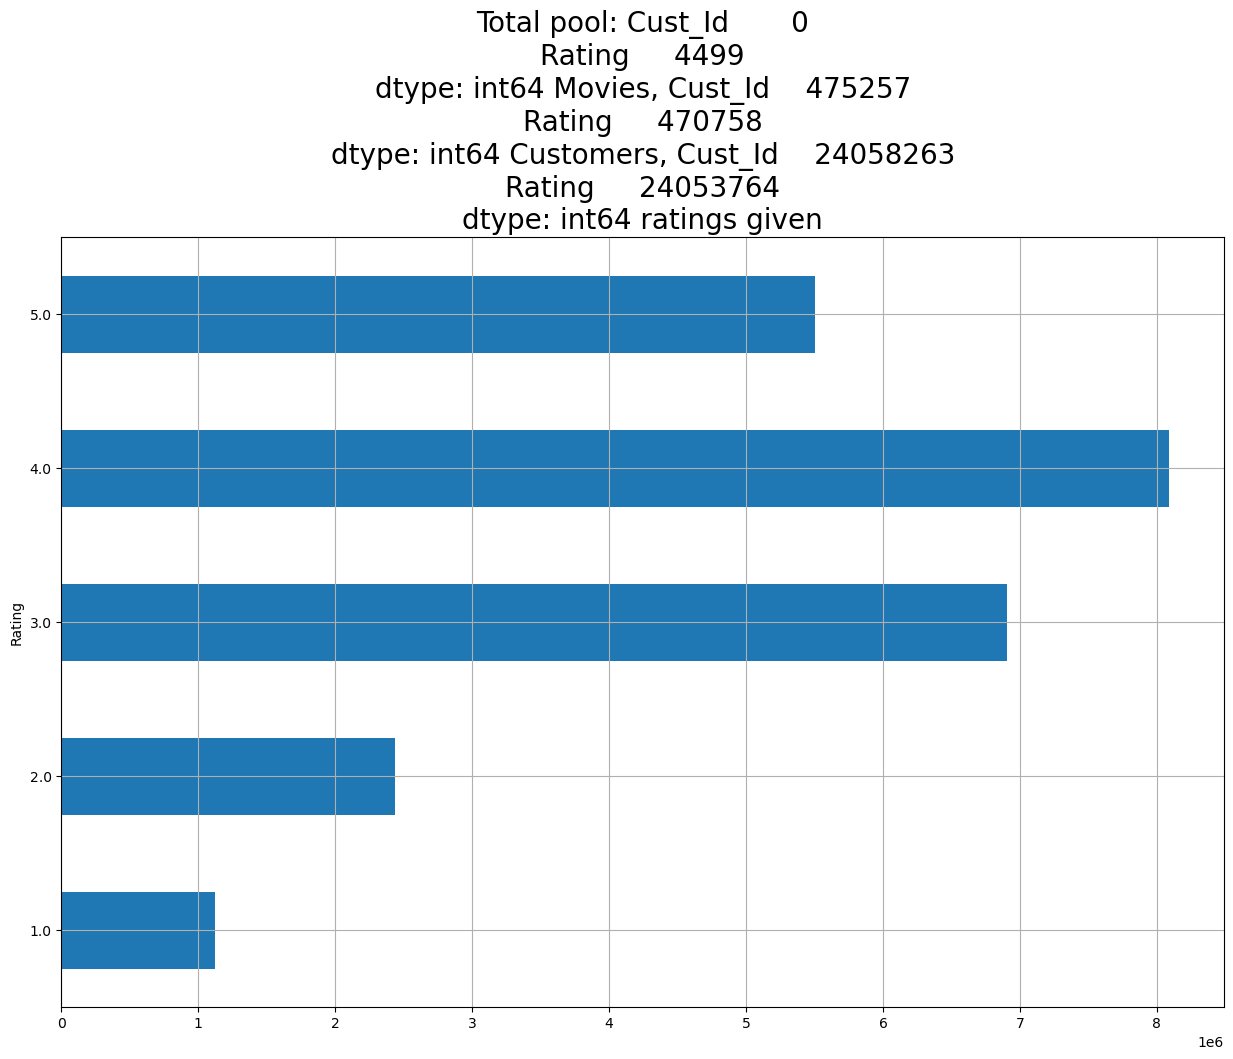

In [14]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [15]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [16]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [17]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [18]:
df_nan.shape

(4499, 1)

In [19]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [20]:
df_nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [21]:
#now we will reset the index as the column
df_nan=df_nan.reset_index()

In [24]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [25]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1



In [ ]:
df_nan.iloc[-1, 0]

In [ ]:
len(netflix_dataset)

In [ ]:
# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(netflix_dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

In [ ]:
len(netflix_dataset)

In [29]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [30]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [31]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [32]:
len(netflix_dataset)

24058263

In [33]:
#working
x=zip(df_nan['index'][1:], df_nan['index'][:-1])

In [34]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [136]:
temp=np.full((1,145), 2) #(shape, fill_value)

In [137]:
print(temp)

[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2]]


In [92]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset.head()

<ipython-input-92-cdbbe0cd23c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id']=movie_np.astype(int)


Now the dataset will look like: 


<ipython-input-92-cdbbe0cd23c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [93]:
netflix_dataset.tail()

,Cust_Id,Rating,Movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [94]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers
f=['count','mean']

In [95]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id').agg(f)

In [96]:
dataset_movie_summary

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [97]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(f)

In [98]:
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [99]:
#now we will store all the movie_id indexes in a variable dataset_movie_summary.index and convert the datatype to int
# dataset_movie_summary.index=dataset_movie_summary.index.map(int)

In [100]:
dataset_movie_summary["count"].quantile(0.7)

1798.6

In [101]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [102]:
dataset_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [103]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [104]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [105]:
# dataset_cust_summary.index=dataset_cust_summary.index.map(int)

In [106]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [107]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='Cust_Id', length=327300)

In [108]:
#we will remove all the customers and movies that are below the benchmark
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [109]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17337458, 3)


In [110]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [111]:
#now we will prepare the dataset for SVD and it takes the matrix as the input
# so for input, we will convert the dataset into sparse matrix
#4499 movies
# df_p = pd.pivot_table(netflix_dataset, values='Rating', index='Cust_Id', columns='Movie_Id')
# print(df_p.shape)

In [113]:
import pandas as pd

In [114]:
df_title = pd.read_csv("movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

df_title.set_index('Movie_Id', inplace=True)

In [115]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [116]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811643 sha256=3033cd75d867b3872a2974e7497469504294313aa43fdbdfb0aed5d94791cab5
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [117]:
#model building

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [118]:
#!pip install scikit-surprise

In [119]:
#help us to read the dataset for svd algo
reader=Reader()

In [120]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [142]:
svd=SVD()
cross_validate(svd, data, measures=['RMSE','MAE'],verbose=True)
#for 1st fold- 1,2,3,4,5

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9937  1.0019  0.9937  0.9968  0.9975  0.9967  0.0030  
MAE (testset)     0.7980  0.8078  0.7993  0.8058  0.7889  0.8000  0.0067  
Fit time          3.91    2.77    2.32    2.12    2.14    2.65    0.67    
Test time         0.14    0.22    0.20    0.13    0.14    0.16    0.04    


{'test_rmse': array([0.9936746 , 1.00192345, 0.9936681 , 0.99678693, 0.99747945]),
 'test_mae': array([0.79799165, 0.8077775 , 0.79933149, 0.80579031, 0.78887707]),
 'fit_time': (3.909299612045288,
  2.76606822013855,
  2.316265106201172,
  2.12237286567688,
  2.136033535003662),
 'test_time': (0.13836407661437988,
  0.22379446029663086,
  0.19913387298583984,
  0.12606143951416016,
  0.13705945014953613)}

In [122]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [123]:
#so first we take user 712664 and we try to recommend some movies based on the past data
#He rated so many movies with 5 *
dataset_712664=netflix_dataset[(netflix_dataset['Cust_Id'] ==712664)& (netflix_dataset['Rating']==5)]
# dataset_712664=dataset_712664.set_index('Movie_Id')
# dataset_712664=dataset_712664.join(df_title)['Name']
dataset_712664

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175
898451,712664,5.0,199
1019562,712664,5.0,241
...,...,...,...
20461546,712664,5.0,3887
21752209,712664,5.0,4109
22487781,712664,5.0,4266
23397883,712664,5.0,4384


In [124]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [125]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset

user_712664=df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [126]:
user_712664=user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [127]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [128]:
user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664=user_712664.drop('Movie_Id', axis=1)

<ipython-input-128-42d8450a9196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)


In [129]:
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664)

         Year                        Name  Estimate_Score
25     2004.0             Never Die Alone        2.857487
16     2005.0                   7 Seconds        2.930071
27     2002.0             Lilo and Stitch        3.569551
10459  1988.0         Red Dwarf: Series 1        3.625433
12890  2003.0                24: Season 3        3.625433
...       ...                         ...             ...
15     1996.0                   Screamers        3.659227
17     1994.0            Immortal Beloved        3.823870
29     2003.0      Something's Gotta Give        3.838164
2      1997.0                   Character        3.882780
7      2004.0  What the #$*! Do We Know!?        3.957530

[14621 rows x 3 columns]


In [130]:
# user_712664.head(10)

In [131]:
user_712664=user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))

      Year                        Name  Estimate_Score
7   2004.0  What the #$*! Do We Know!?        3.957530
2   1997.0                   Character        3.882780
29  2003.0      Something's Gotta Give        3.838164
17  1994.0            Immortal Beloved        3.823870
15  1996.0                   Screamers        3.659227
54  1995.0                        Jade        3.625433
75  1952.0       I Love Lucy: Season 2        3.625433
67  2004.0                 Invader Zim        3.625433
57  1996.0                 Dragonheart        3.625433
56  1995.0                 Richard III        3.625433
